## 模型中特征子集的选择

属性子集选择：目标是找出最小属性集，使得数据类的概率分布尽可能地接近使用所有属性的原分布。在压缩 的属性集上挖掘还有其它的优点。它减少了出现在发现模式上的属性的数目，使得模式更易于理解。

* 逐步向前选择：该过程由空属性集开始，选择原属性集中最好的属性，并将它添加到该集合中。在其后的每一次迭代，将原属性集剩下的属性中的最好的属性添加到该集合中。
* 逐步向后删除：该过程由整个属性集开始。在每一步，删除掉尚在属性集中的最坏属性。
* 向前选择和向后删除的结合：向前选择和向后删除方法可以结合在一起，每一步选择一个最好的属性，并在剩余属性中删除一个最坏的属性。。

子集的选择，实质就是对变量进行选择。不同特征(变量)的组合构成了模型的全部集合，而最优的模型就存在于我们要找到的特征子集中。

寻找特征(变量)时，该是以改善、提高模型预测效果为目标的，还需要考虑模型的过拟合的问题，所以，变量选择的过程同样要遵循—balance between bias and variance.

有两个大角度来看待变量选择的问题，一个是概率统计的角度(经典统计方法与贝叶斯方法)，一个是机器学习中的算法模型的角度(正则化)。

### 概率统计的角度
**经典统计方法：**

(1)基于假设，通过系数t、f值的判断
Two ways: forward selection and backward elimination.

(2)基于规则的判断，通过结合AIC、BIC、LRT、拟合优度等准则来进行变量的筛选
缺点：无法处理高维数据，且该方法不稳健。这种方法筛选变量的时候，需要遍历$2^p$个候选模型去进行两两比较。

(3) Resampling，抽样结合上述2中方法
在不同变量选择所形成的不同模型之间的比较阶段，一般是采用逐步回归，加上上述三种方法进行的。

**Bayesian方法：**
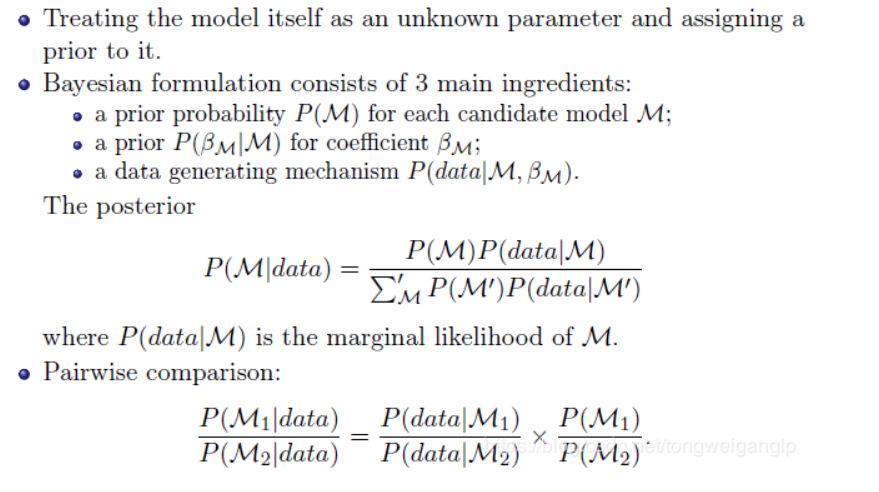

### 正则化方法Regularization：
为克服传统机器学习泛化能力差的问题，统计学引进了 “泛化误差界” 的概念，就是指真实的风险应该有两部分构成，一部分是"经验风险"，另一部分是"置信风险"。

置信风险代表了能够在多大程度上信任分类器在未知样本上的分类结果。显然，第二部分也是无法精确计算的，只能给出区间。这也使得整个误差只能计算上界，而无法计算精确的值。

“置信风险” 与两个量有关，一是样本量，二是分类函数的VC维。显然样本量越大，置信风险越小，而VC维越大置信风险会变大。

泛化误差界的公式为：
$R(w)≤Remp(w)+Ф(n/h)$

公式中R(w)就是真实风险，Remp(w)就是经验风险，Ф(n/h)就是置信风险。统计学习的目标从经验风险最小化变为了寻求经验风险与置信风险的和最小，即结构风险最小。

正则化是结构风险最小化策略的实现，是在经验风险上加一个正则化项或惩罚项。正则化项一般是模型复杂度的单调递增函数，模型越复杂，正则化项就越大。

### 岭回归
适合处理：
* 特征变量太多：变量太多时，不加惩罚的拟合模型时，将会导致预测区间很大，最小二乘估计值将不会产生唯一结果
* 病态的X矩阵：最小二乘估计的解会依赖矩阵$(X'X)^−1$如果矩阵X′X 不满秩，即为奇异矩阵，则计算参数β时将会出现问题。在这种情况下，X 中元素的微小波动，都会导致$(X'X)^−1$的剧烈变化,最小二乘估计$β_LS$ 可能对训练集可以得到一个较好的估计，但是对于测试集仍不满足

岭回归的几何解释：黄色的交点就是满足目标函数下的岭回归系数值

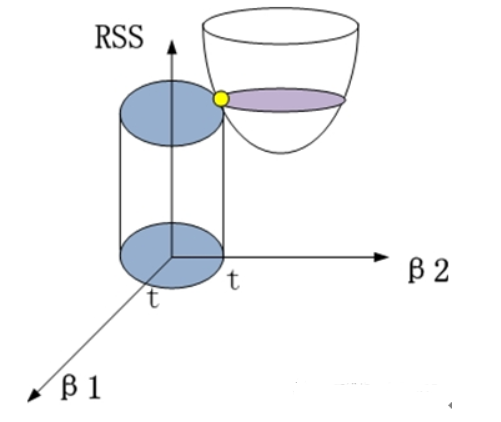

映射到二维平面中：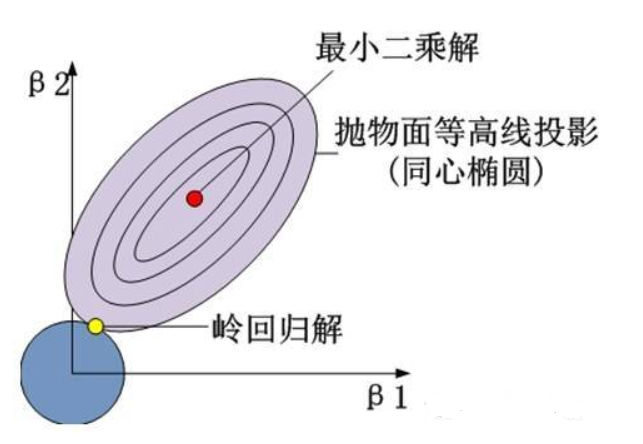

椭圆对应的等高线轮廓代表着残差平方和(RSS)：轮廓越小代表着残差平方和越小，在最小二乘估计下，残差平方和最小。

当维度p=2时，岭回归估计受限于条件：$∑^pj=1(β^2_j )<c$
岭回归中我们试图同时使得椭圆和圆达到最小规模。岭回归估计就是椭圆与圆的交点。

我们要权衡惩项和RSS之间的值，且惩罚项中(λ和c之间是对应的)，λ越大(c越小), β_j
就越接近零。极端情况下，当λ=0时，那么岭回归将退化成普通的线性回归。相反，如果λ接近无穷大那么所有的 $β_j$都接近零。

岭回归估计的特点：

(1) β的最小二乘估计是无偏的，而β的岭回归估计是有偏的。

(2) 对于正交协变量，$X′X=nI_p，βˆRidge=n/(n+λ)βˆLs$
因此，岭回归估计倾向于把参数压缩成0，λ 控制着压缩的程度。

(3) 有效自由度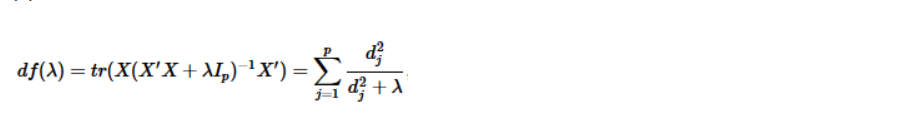
其中，d是X的奇异值。
对于有效自由度，如果λ=0，我们有p个参数(无惩罚项)，即有效自由度为p；如果λ非常大(λ→∞)，参数将受很大限制，且有效自由度将变得很小，趋于0.

岭参数的选择

岭回归系数会随着lambda的变化而变化，为保证选择出最佳的岭回归系数，一般会选择定性的可视化方法和定量的统计方法。对这种方法作如下说明：

1）绘制不同lambda值与对应的beta值之间的折线图，寻找那个使岭回归系数趋于稳定的lambda值；同时与OLS相比，得到的回归系数更符合实际意义；

2）方差膨胀因子法，通过选择最佳的lambda值，使得所有方差膨胀因子不超过10；

3）虽然lambda的增大，会导致残差平方和的增加，需要选择一个lambda值，使得残差平方和趋于稳定（即增加幅度细微）。

### LASSO
岭回归的结果β只是接近零，而不没有被压缩等于零。那么如果我们把损失方差中的限制条件变为从二范式变为一范式，则：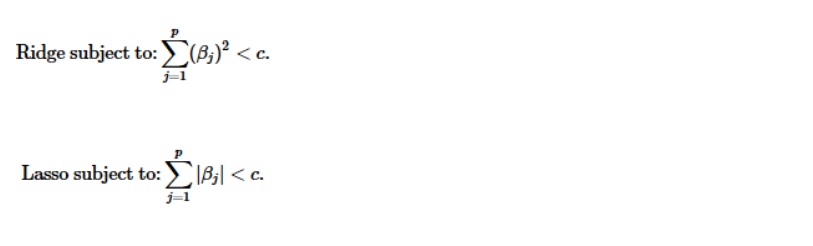
lasso是用一范式进行限制压缩的，所以在限制阈中，是存在"直角"的。以二维情况下为例，值域与限制阈相交的点被压缩到了坐标轴上


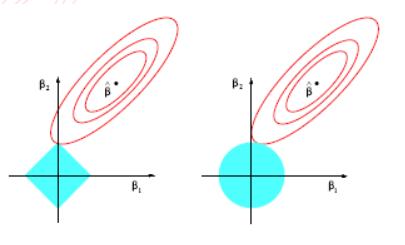

lasso实际上是一种"软阈值"方法，当参数变化时，估计参数的变化路径是连续的趋于零的。

lasso损失方程已不是二次的，但仍然是凸函数：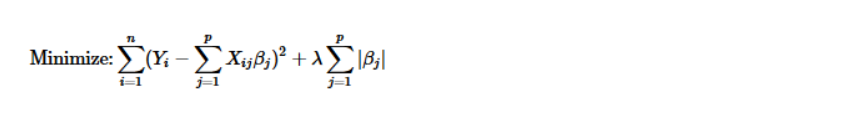
与岭回归不同，因为其在Y轴是非线性的，所以没有解析解。

lasso回归于岭回归只是在惩罚函数部分有所不同，但这个不同却让lasso明显占了很多优势，例如在变量选择上就比岭回归强得多。就以直观的图形为例，lasso回归的惩罚函数映射到二维空间的话，就会形成“角”，一旦“角”与抛物面相交，就会导致beta1为0（如上图所示），这样beta1对应的变量就是一个可抛弃的变量。但是在岭回归过程中，没有“角”的圆形与抛物面相交，出现岭回归系数为0的概率还是非常小的。

### 岭回归和LASSO的比较

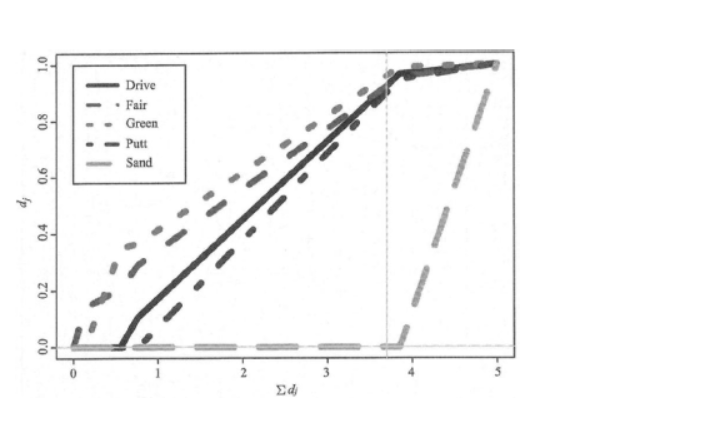由上图可知，随着$Σd=M$的不同，权重d也在变化，M=p=5时，d=1相当于权重没有影响，所以，一般选取M≤p即可。而如果M=3~4之间(图中竖线位置)，则Sand这个变量的d=0，这个维度就被剔除了。

2维下，岭回归，不同r对应的可行域及beta值如下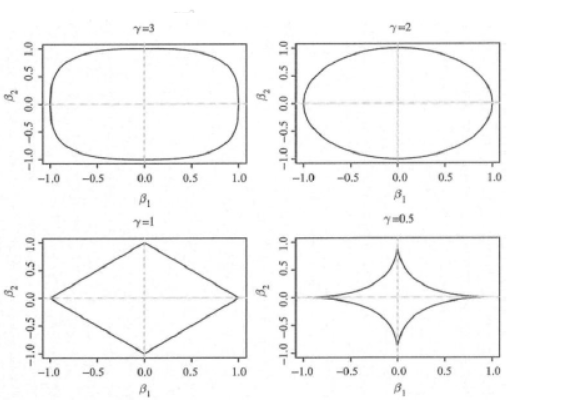

最小二乘的beta系数与桥回归beta系数之间的对应关系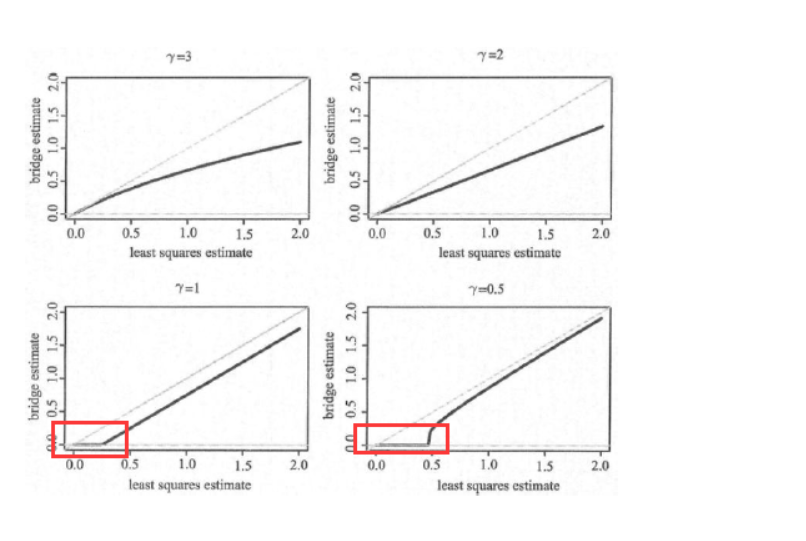只有r≤1时，压缩效果才好，“encourages sparsity”很小的beta值对应的变量会被剔除掉。

### rr和lasso对回归系数的二次型的影响

根据Heer提出的岭回归方法，可以将岭回归系数的求解表达式写成如下这个式子：
$β(λ)=(X^TX+λI)$<sup>−1</sup>$X^Ty$

不难发现，回归系数β的值将随着λ的变化而变化，当λ=0时，其就退化为线性回归模型的系数值。
实际上，岭回归系数的解中被称为目标函数的惩罚函数的是一个L2范数，它可以确保岭回归系数beta值不会变的很大，起到收缩的作用，这个收缩力度就可以通过lambda来平衡。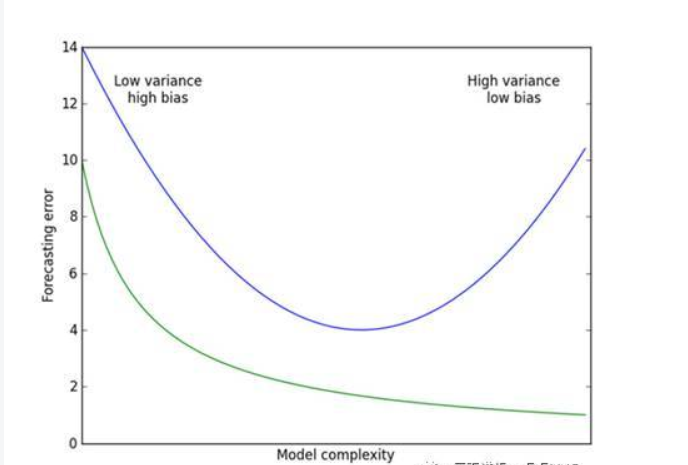横坐标是模型的复杂度，纵坐标是模型的预测误差，绿色曲线代表的是模型在训练集上的效果，蓝色曲线代表的是模型在测试集的效果。从预测效果的角度来看，随着模型复杂度的提升，在训练集上的预测效果会越来越好，呈现在绿色曲线上就是预测误差越来越低，但是模型运用到测试集的话，预测误差就会呈现蓝色曲线的变化，先降低后上升（过拟合）；从模型方差角度（即回归系数的方差）来看，模型方差会随着复杂度的提升而提升。针对上面这个图而言，对于岭回归来说，随着lambda的增大，模型方差会减小（因为矩阵X’X行列式在增大，其逆就是减小，从而使得岭回归系数在减小）而偏差会增大。故通过lambda来平衡模型的方差和偏差，最终得到比较理想的岭回归系数。